# Color Threshold, Blue Screen

### Import resources

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

%matplotlib inline

### Read in and display the image

In [2]:
# Read in the image
image = cv2.imread('images/pizza_bluescreen.jpg')

# Print out the type of image data and its dimensions (height, width, and color)
print('This image is:', type(image), 
      ' with dimensions:', image.shape)


This image is: <class 'numpy.ndarray'>  with dimensions: (514, 816, 3)


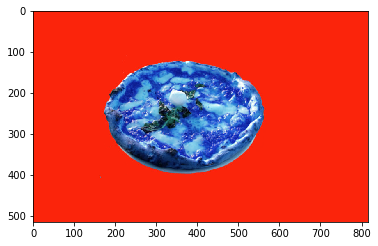

In [4]:
# the default way cv2 reads an  image is in BGR format
# Display the image copy
plt.imshow(image)

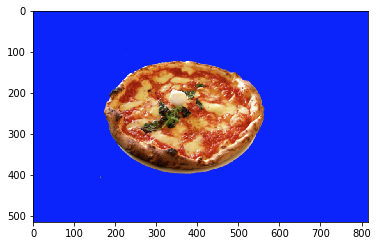

In [3]:
# Make a copy of the image
image_copy = np.copy(image)


# Change color to RGB (from BGR)
image_copy = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB)

# Display the image copy
plt.imshow(image_copy)


In [15]:
'''Why BGR instead of RGB? 
OpenCV reads in images in BGR format (instead of RGB) because when OpenCV was first being developed, BGR color format was popular among camera manufacturers and image software providers. The red channel was considered one of the least important color channels, so was listed last, and many bitmaps use BGR format for image storage. However, now the standard has changed and most image software and cameras use RGB format, which is why, in these examples, it's good practice to initially convert BGR images to RGB before analyzing or manipulating them.'''

"Why BGR instead of RGB? \nOpenCV reads in images in BGR format (instead of RGB) because when OpenCV was first being developed, BGR color format was popular among camera manufacturers and image software providers. The red channel was considered one of the least important color channels, so was listed last, and many bitmaps use BGR format for image storage. However, now the standard has changed and most image software and cameras use RGB format, which is why, in these examples, it's good practice to initially convert BGR images to RGB before analyzing or manipulating them."

### Define the color threshold for blue background

In [19]:
## TODO: Define the color selection boundaries in RGB values
# play around with these values until you isolate the blue background
lower_blue = np.array([0,0,200]) # can contain any low value of red and green..but we need some amount of blue color 
upper_blue = np.array([50,50,255]) # can contain some value of red and green..but we need intense blue color 


### Create a mask

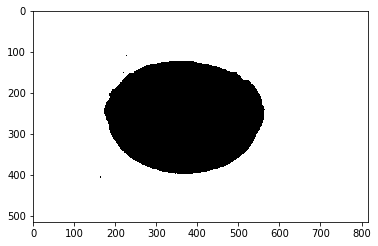

In [20]:
# Define the masked area
# colors found in this range are turned white, everything else is turned black
mask = cv2.inRange(image_copy, lower_blue, upper_blue)

# Vizualize the mask
plt.imshow(mask, cmap='gray')

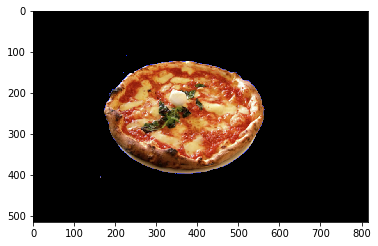

In [21]:
# Mask the image to let the pizza show through
masked_image = np.copy(image_copy)

masked_image[mask != 0] = [0, 0, 0]  # make that are black, where the mask is not black

# Display it!
plt.imshow(masked_image)


### Mask and add a background image

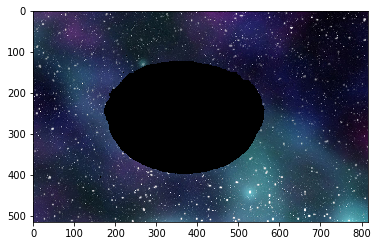

In [22]:
# Load in a background image, and convert it to RGB 
background_image = cv2.imread('images/space_background.jpg')
background_image = cv2.cvtColor(background_image, cv2.COLOR_BGR2RGB)

# Crop it to the right size (514x816)
crop_background = background_image[0:514, 0:816]

# Mask the cropped background so that the pizza area is blocked
crop_background[mask == 0] = [0, 0, 0]

# Display the background
plt.imshow(crop_background)

### Create a complete image

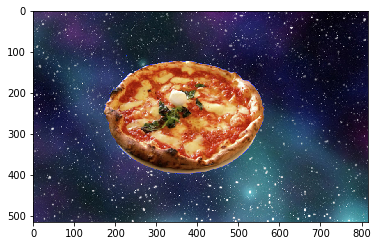

In [23]:
# Add the two images together to create a complete image!
# since crop_background has black area(zero pixel values) in the centre, a simple addition would work
complete_image = masked_image + crop_background

# Display the result
plt.imshow(complete_image)